Download attack data from into csv file

In [42]:
from dotenv import load_dotenv
import os
from wandb_download import extract_wandb_runs_to_csv

load_dotenv()  # Load environment variables from .env file
project_name = os.getenv("WANDB_PROJECT")
entity_name = os.getenv("WANDB_ENTITY")
assert project_name, "Please set the WANDB_PROJECT environment variable"
assert entity_name, "Please set the WANDB_ENTITY environment variable"
output_file = "project.csv"

extract_wandb_runs_to_csv(project_name, entity_name, output_file)

In [43]:
import pandas as pd
df = pd.read_csv(output_file)
df.head()

,_wandb.runtime,_timestamp,pascal_voc/mAP,pascal_voc/AP50,time,_step,_runtime,data_time,attack,config_file,...,model.train_cfg.rpn_proposal.max_per_img,model.train_cfg.rpn_proposal.min_bbox_size,model.bbox_head.loss_bbox.beta,model.bbox_head.bbox_coder.target_stds,model.bbox_head.bbox_coder.target_means,model.train_cfg.assigner.min_pos_iou,model.train_cfg.assigner.neg_iou_thr,model.train_cfg.assigner.pos_iou_thr,model.train_cfg.assigner.ignore_iof_thr,name
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pgd_attack,models/atss_swin-b_voc0712_coco_metric/atss_sw...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,atss_swin-b_voc0712_coco_metric
1,1910.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pgd_attack,models/atss_swin-b_voc0712_coco_metric/atss_sw...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,atss_swin-b_voc0712_coco_metric
2,1867.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fgsm_attack,models/atss_swin-b_voc0712_coco_metric/atss_sw...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,atss_swin-b_voc0712_coco_metric
3,1878.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bim_attack,models/atss_swin-b_voc0712_coco_metric/atss_sw...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,atss_swin-b_voc0712_coco_metric
4,1880.0,1.717098e+09,0.011573,0.012,0.318094,1.0,1881.313715,0.002199,fgsm_attack,models/fsaf_swin-b_voc0712/fsaf_swin-b_voc0712.py,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fsaf_swin-b_voc0712


Keep interesting columns and observations

In [46]:
df = df.filter(regex="attack|^name$|pascal|State")
df = df[df["pascal_voc/AP50"].notna()]
df.head()

,pascal_voc/mAP,pascal_voc/AP50,attack,attack_kwargs.alpha,attack_kwargs.steps,attack_kwargs.epsilon,attack_kwargs.targeted,attack_kwargs.random_start,attack_kwargs.norm,name
4,0.011573,0.012,fgsm_attack,0.01,NaN,8,False,NaN,inf,fsaf_swin-b_voc0712
7,0.011087,0.011,bim_attack,0.01,20.0,8,False,NaN,inf,fsaf_swin-b_voc0712
8,0.708506,0.709,bim_attack,0.01,20.0,8,False,NaN,inf,free_anchor_swin-b_voc0712
9,0.508908,0.509,bim_attack,0.01,1.0,8,False,NaN,inf,libra_rcnn_swin-b_voc0712
10,0.010990,0.011,bim_attack,0.01,1.0,8,False,NaN,inf,fsaf_swin-b_voc0712


In [48]:
df.to_csv("project_filtered.csv", index=False)

/pfs/work7/workspace/scratch/ma_jjakubas-team_project_fss2024/miniconda3/envs/benchmark/lib/python3.10/site-packages/plotnine/utils.py:596: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/pfs/work7/workspace/scratch/ma_jjakubas-team_project_fss2024/miniconda3/envs/benchmark/lib/python3.10/site-packages/plotnine/utils.py:596: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/pfs/work7/workspace/scratch/ma_jjakubas-team_project_fss2024/miniconda3/envs/benchmark/lib/python3.10/site-packages/plotnine/geoms/geom.py:289: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future vers

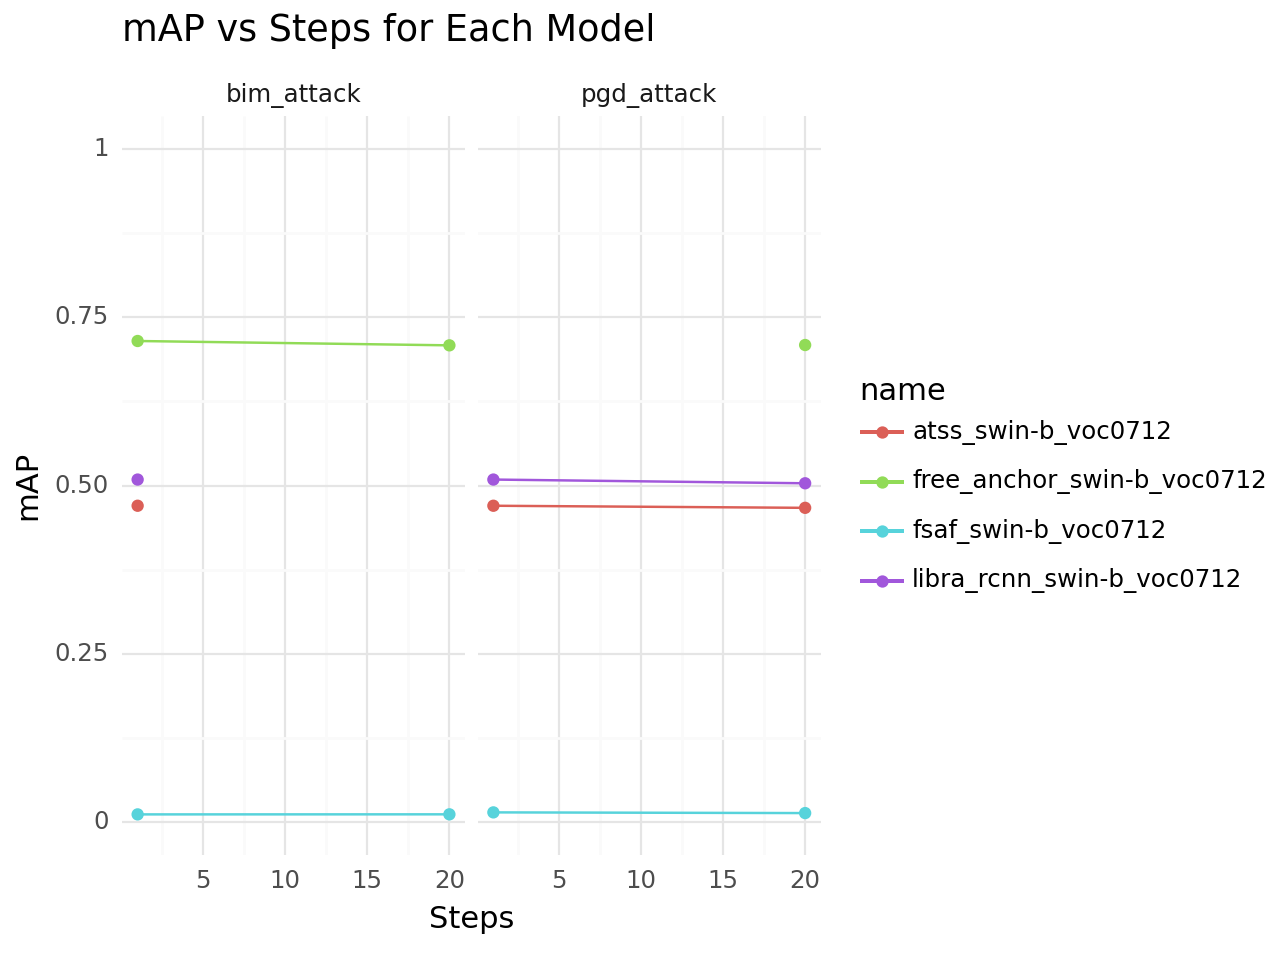

<Figure Size: (640 x 480)>

In [55]:
from plotnine import ggplot, aes, geom_line, geom_point, labs, theme_minimal, facet_wrap, scale_y_continuous

df_filtered = df[['pascal_voc/mAP', 'attack_kwargs.steps', 'name', 'attack']].dropna()

plot = (ggplot(df_filtered, aes(x='attack_kwargs.steps', y='pascal_voc/mAP', color='name'))
        + geom_line()
        + geom_point()
        + labs(title='mAP vs Steps for Each Model',
               x='Steps',
               y='mAP')
        + theme_minimal()
        + facet_wrap('~attack')
        + scale_y_continuous(limits=(0, 1)))

plot
